In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
#Import the requests library
import requests
#Import API key
from config import api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [7]:
#Create an endpoint URL for a city
city_url = url + "&q=" + "city"

In [8]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print('beginning data retrieval    ')
print('----------------------------')

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

beginning data retrieval    
----------------------------
Processing Record 1 of Set 1 | hay river
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | garowe
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | gubskaya
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | fort n

Processing Record 38 of Set 4 | lesnoy
Processing Record 39 of Set 4 | pauini
Processing Record 40 of Set 4 | kapaa
Processing Record 41 of Set 4 | boden
Processing Record 42 of Set 4 | paamiut
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | seymchan
Processing Record 46 of Set 4 | tiznit
Processing Record 47 of Set 4 | birnin kebbi
Processing Record 48 of Set 4 | wilmington island
Processing Record 49 of Set 4 | lesosibirsk
Processing Record 50 of Set 4 | ibra
Processing Record 1 of Set 5 | apac
Processing Record 2 of Set 5 | buala
Processing Record 3 of Set 5 | ust-kuyga
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | taoudenni
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | verkhnyaya inta
Processing Record 9 of Set 5 | abalak
Processing Record 10 of Set 5 | thompson
Processing Record 11 of Set 5 | sedelnikovo
City not fou

Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | jibuti
Processing Record 32 of Set 8 | dymer
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | puerto leguizamo
Processing Record 35 of Set 8 | selje
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | mongar
Processing Record 38 of Set 8 | kuruman
Processing Record 39 of Set 8 | nabire
Processing Record 40 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | morros
Processing Record 43 of Set 8 | ruian
City not found. Skipping...
Processing Record 44 of Set 8 | fukuma
Processing Record 45 of Set 8 | acari
Processing Record 46 of Set 8 | carballo
Processing Record 47 of Set 8 | hanzhong
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | huescar
Processing Record 50 of Set 8 | kudahuvadhoo
Processing Record 1 of Set 9 | san patricio
Processing Record 2 of Se

Processing Record 15 of Set 12 | odweyne
Processing Record 16 of Set 12 | a
City not found. Skipping...
Processing Record 17 of Set 12 | kainantu
Processing Record 18 of Set 12 | springbok
Processing Record 19 of Set 12 | galveston
Processing Record 20 of Set 12 | arona
Processing Record 21 of Set 12 | toliary
City not found. Skipping...
Processing Record 22 of Set 12 | bauta
Processing Record 23 of Set 12 | hutchinson
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | katobu
Processing Record 26 of Set 12 | mergui
City not found. Skipping...
Processing Record 27 of Set 12 | livingston
Processing Record 28 of Set 12 | koutsouras
Processing Record 29 of Set 12 | yorosso
Processing Record 30 of Set 12 | mahon
Processing Record 31 of Set 12 | gaeta
Processing Record 32 of Set 12 | cartagena
Processing Record 33 of Set 12 | abu samrah
Processing Record 34 of Set 12 | itaquyry
Processing Record 35 of Set 12 | moussoro
Processing Record 36 of Set 12 | zephyrhills
Processi

In [9]:
len(city_data)

574

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,58.98,94,90,12.66,CA,2021-07-23 03:36:49
1,Vaini,-21.2000,-175.2000,80.76,78,20,5.75,TO,2021-07-23 03:36:49
2,Garowe,8.4054,48.4845,75.60,63,56,28.30,SO,2021-07-23 03:36:49
3,Nemuro,43.3236,145.5750,82.83,90,72,13.58,JP,2021-07-23 03:36:50
4,East London,-33.0153,27.9116,53.29,66,98,20.00,ZA,2021-07-23 03:36:50
5,La Ronge,55.1001,-105.2842,71.85,43,90,5.75,CA,2021-07-23 03:36:51
6,Talnakh,69.4865,88.3972,55.67,76,100,5.93,RU,2021-07-23 03:36:05
7,Ushuaia,-54.8000,-68.3000,38.86,81,75,9.22,AR,2021-07-23 03:36:51
8,Port Elizabeth,-33.9180,25.5701,50.29,81,0,9.22,ZA,2021-07-23 03:36:51
9,Airai,-8.9266,125.4092,77.23,23,7,3.78,TL,2021-07-23 03:36:52


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hay River,CA,2021-07-23 03:36:49,60.8156,-115.7999,58.98,94,90,12.66
1,Vaini,TO,2021-07-23 03:36:49,-21.2000,-175.2000,80.76,78,20,5.75
2,Garowe,SO,2021-07-23 03:36:49,8.4054,48.4845,75.60,63,56,28.30
3,Nemuro,JP,2021-07-23 03:36:50,43.3236,145.5750,82.83,90,72,13.58
4,East London,ZA,2021-07-23 03:36:50,-33.0153,27.9116,53.29,66,98,20.00
5,La Ronge,CA,2021-07-23 03:36:51,55.1001,-105.2842,71.85,43,90,5.75
6,Talnakh,RU,2021-07-23 03:36:05,69.4865,88.3972,55.67,76,100,5.93
7,Ushuaia,AR,2021-07-23 03:36:51,-54.8000,-68.3000,38.86,81,75,9.22
8,Port Elizabeth,ZA,2021-07-23 03:36:51,-33.9180,25.5701,50.29,81,0,9.22
9,Airai,TL,2021-07-23 03:36:52,-8.9266,125.4092,77.23,23,7,3.78


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

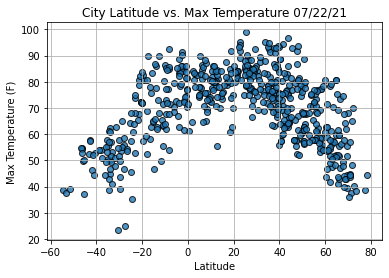

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

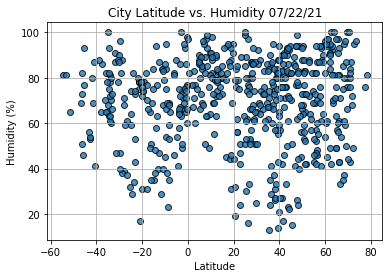

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

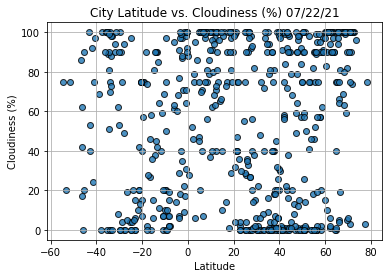

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

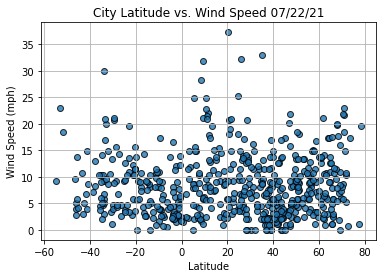

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

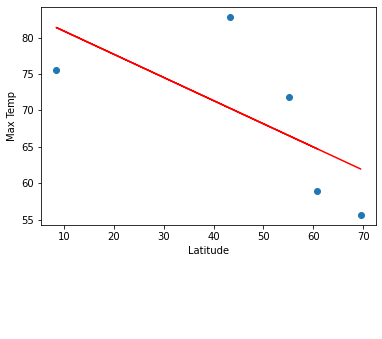

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

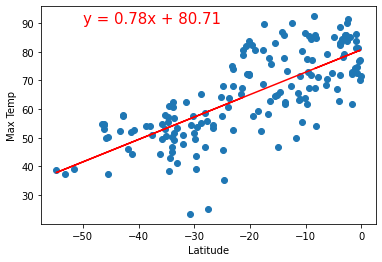

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

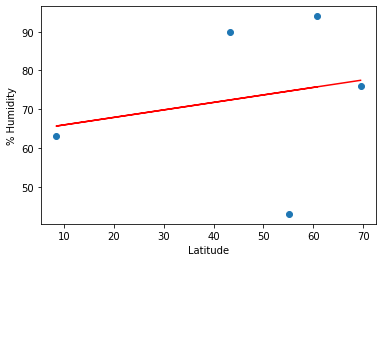

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

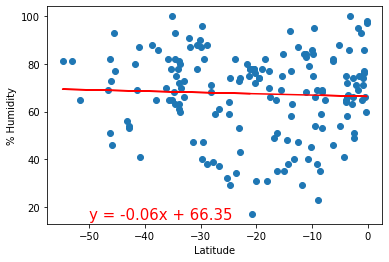

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

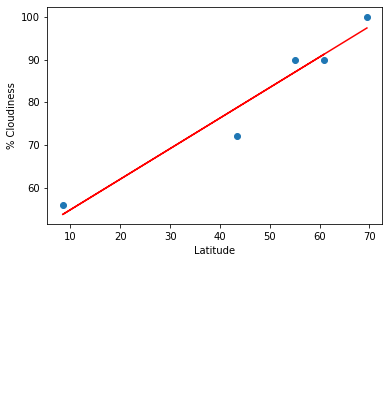

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

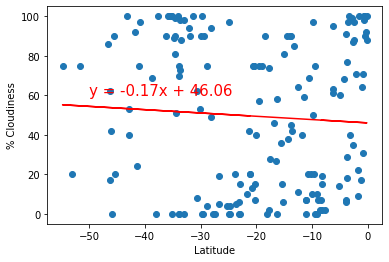

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

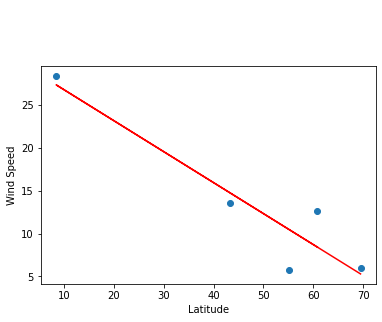

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

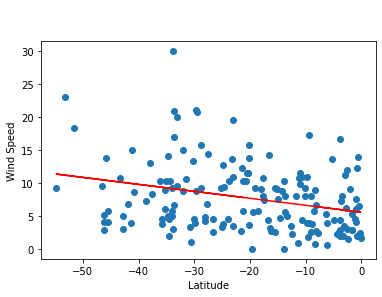

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))